
The Iris Flower Species Classification project aims to demonstrate the application of machine learning techniques in solving real-world problems. The project focuses on classifying Iris flowers into three species—setosa, versicolor, and virginica—based on their physical measurements, including sepal length, sepal width, petal length, and petal width. This project is particularly relevant as it mirrors scenarios where machine learning is used for species identification, which finds applications in botany, ecology, and more.

In [110]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data collection and preparation

In [111]:
df=pd.read_csv(r'/home/tanvi/Documents/Iris.csv')

In [112]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [113]:
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [114]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [116]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### preprocessing the data


In [117]:
#to display if there any null values in iris dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory data analysis

<Axes: >

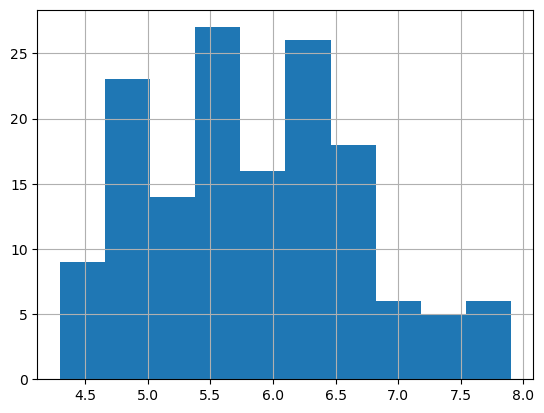

In [118]:
df['SepalLengthCm'].hist()

<Axes: >

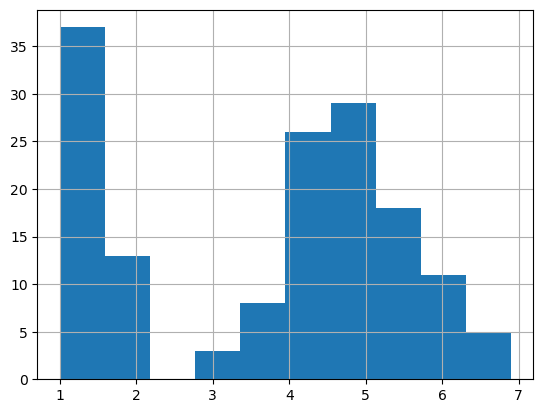

In [119]:
df['PetalLengthCm'].hist()

<Axes: >

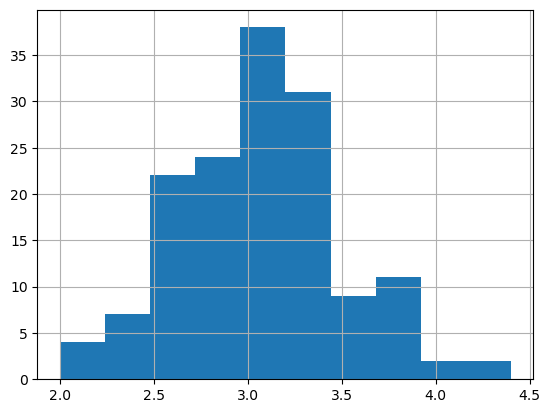

In [120]:
df['SepalWidthCm'].hist()

<Axes: >

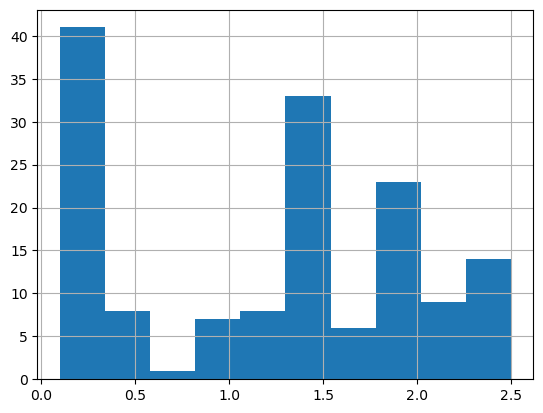

In [121]:
df['PetalWidthCm'].hist()

In [122]:
#scatter plot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']


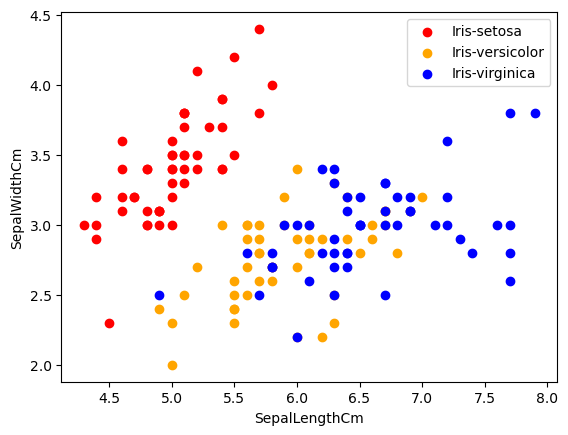

In [123]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

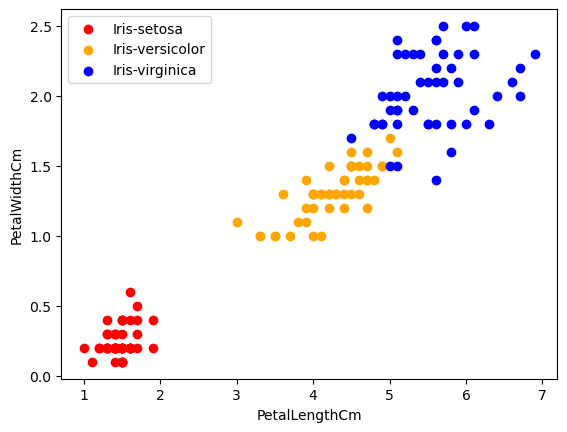

In [124]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

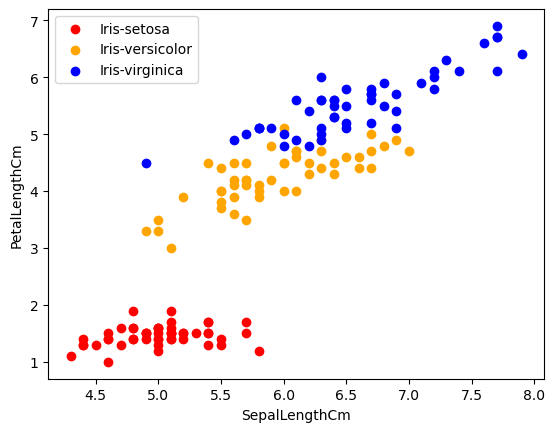

In [125]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

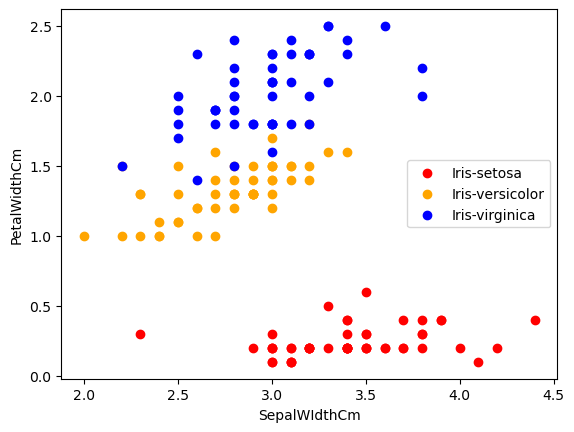

In [126]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalWIdthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [127]:
new_data = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
print(new_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


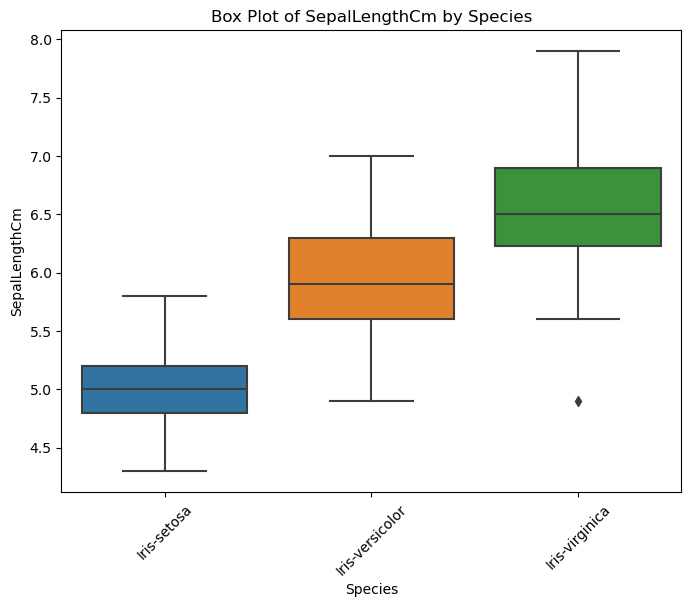

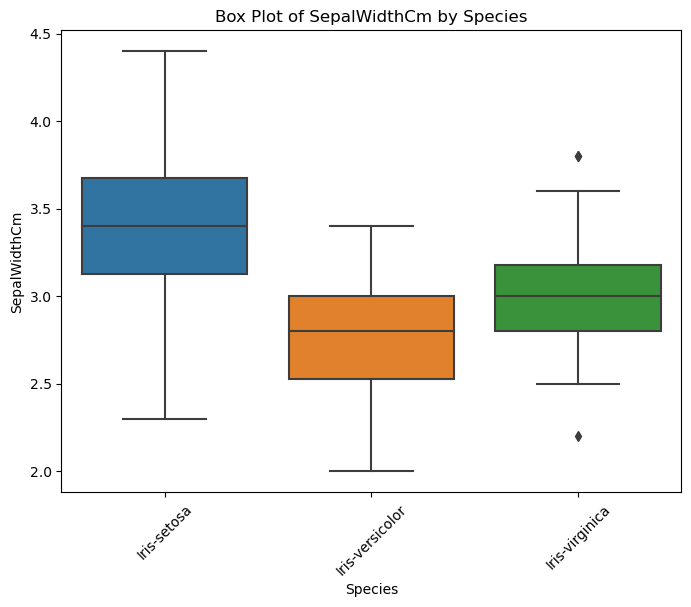

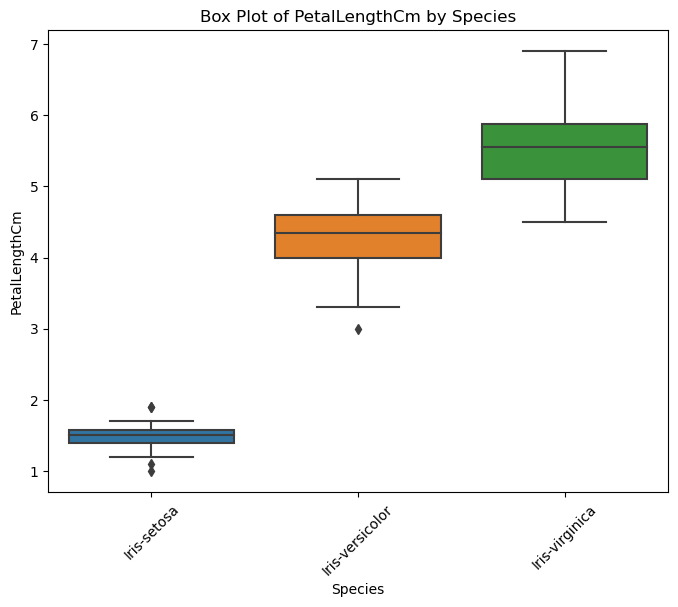

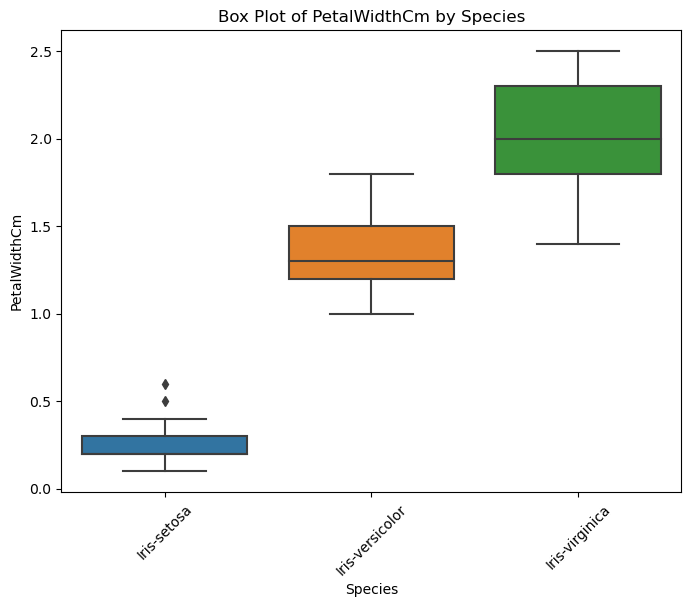

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
df.drop('Id', axis=1, inplace=True)
species_names = df['Species'].unique()

for feature in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

### Volin plot

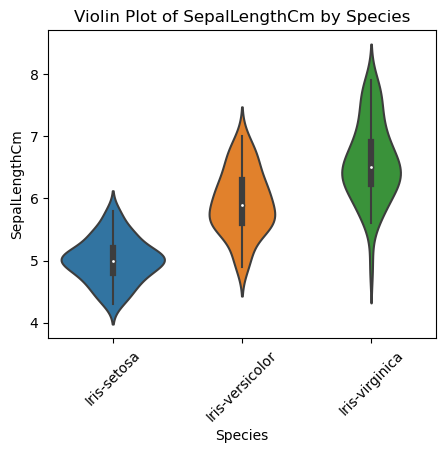

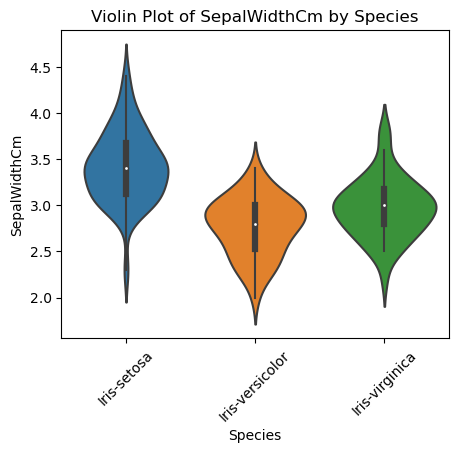

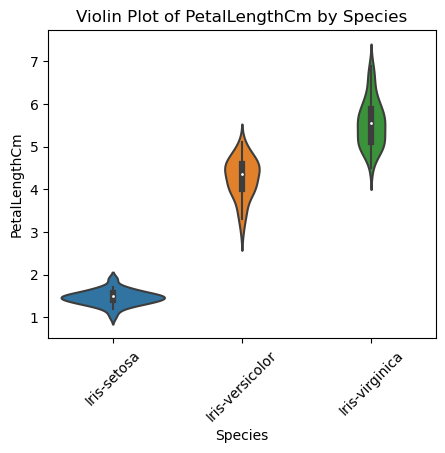

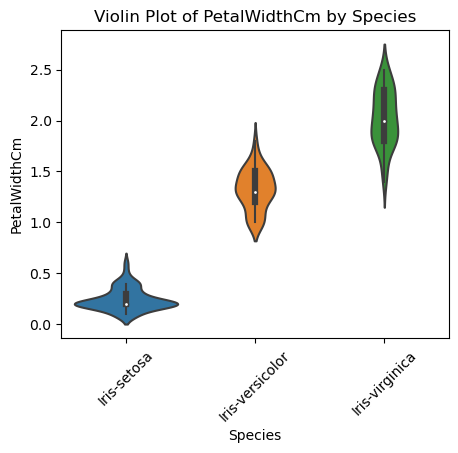

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

species_names = df['Species'].unique()

for feature in df.columns[:-1]:
    plt.figure(figsize=(5, 4))
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

### Coorelation Matrix

In [131]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

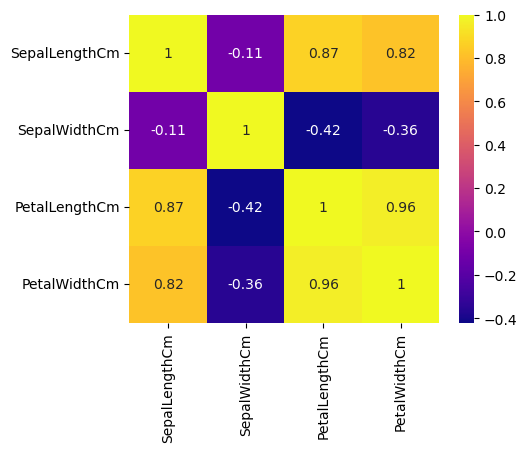

In [132]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap = 'plasma')

### Label Encoder

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
df['Species']=le.fit_transform(df['Species'])

In [135]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Seprating x and y for training purpose

In [136]:
x = df.iloc[:,:-1]

In [137]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [138]:
y = df.iloc[:,-1]

In [139]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### Train Test Split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [142]:
xtrain.shape

(105, 4)

### Evaluation metrics

In [143]:
from sklearn.metrics import classification_report

In [144]:
#func for model
def irismodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"training accuracy: {train}\n Testing accuracy: {test}")
    print(classification_report(ytest,ypred))
    return model

### importing Algorithm

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [146]:
logreg = irismodel(LogisticRegression())

training accuracy: 0.9809523809523809
 Testing accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [147]:
knn = irismodel(KNeighborsClassifier())

training accuracy: 0.9523809523809523
 Testing accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [148]:
SVC = irismodel(SVC())

training accuracy: 0.9619047619047619
 Testing accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Scailing value and applying algorithm to it

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [150]:
logreg = irismodel(LogisticRegression())

training accuracy: 0.9714285714285714
 Testing accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [151]:
knn = irismodel(KNeighborsClassifier())

training accuracy: 0.9714285714285714
 Testing accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [152]:
SVC = irismodel(SVC)

training accuracy: 0.9809523809523809
 Testing accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Cross validation score with Logistic regression

In [153]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(logreg,x,y,cv=5,scoring='accuracy')

In [154]:
cvs

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [155]:
cvs.std()

0.02494438257849294

In [156]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (cvs.mean(),cvs.std()))

Mean score of 0.97 with a standard deviation of 0.02


### Cross validation score with KNN

In [157]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(knn,x,y,cv=5,scoring='accuracy')

In [158]:
cvs

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [159]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (cvs.mean(),cvs.std()))

Mean score of 0.97 with a standard deviation of 0.02


### Cross validation score with SVM

In [160]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(SVC,x,y,cv=5,scoring='accuracy')

In [161]:
cvs

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [162]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (cvs.mean(),cvs.std()))

Mean score of 0.97 with a standard deviation of 0.02
